<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/detection_and_segmentation/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###AR (Autoregression)


An autoregressive model uses a linear combination of past values of the target to make forecasts. The regression is made against the target itself.
AR(p) model is incredibly flexible and it can model many different types of time series patterns. Usually, autoregressive models are applied to stationary time series only. The AR(5) model example is like the below.

ref: http://blog.mindymallory.com/2018/01/basic-time-series-analysis-single-equation-models-arima/

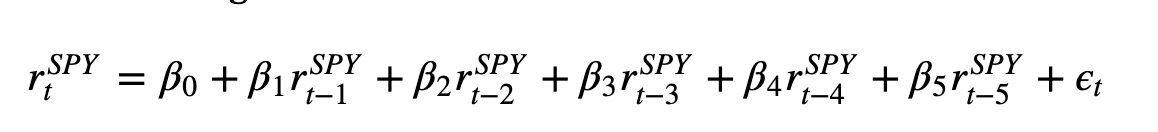

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


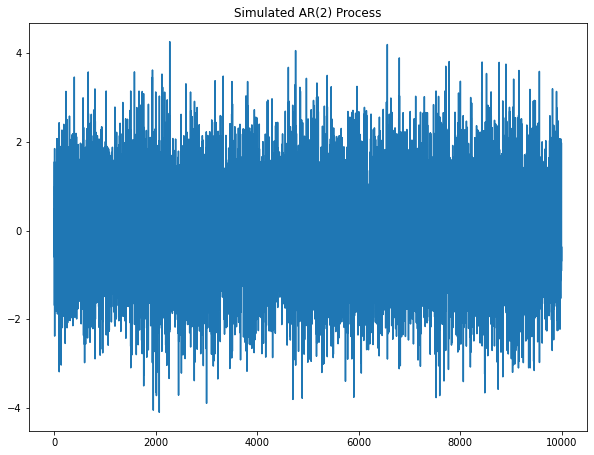

rho: [0.33325492 0.50171931]
sigma: 1.0009137681637028


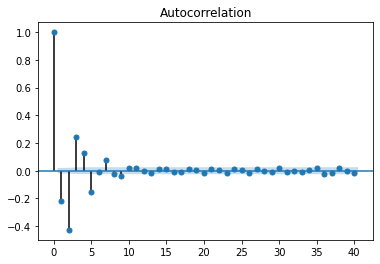

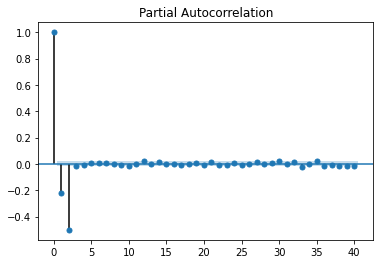

In [ ]:
#source: https://towardsdatascience.com/time-series-forecasting-with-autoregressive-processes-ba629717401

from statsmodels.graphics.tsaplots import plot_pacf   
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#coefficients [sigma, phi, phi], result must be close
ar2 = np.array([1, 0.33, 0.5])
ma = np.array([1])

#generate data
simulated_AR2_data = ArmaProcess(ar2, ma).generate_sample(nsample=10000)

plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR2_data)
plt.title("Simulated AR(2) Process")
plt.show()

plot_acf(simulated_AR2_data); #autocorrelation plot
plot_pacf(simulated_AR2_data); #partial autocorrelation plot

#coefficients phi estimation using tule_walker equation
rho, sigma = yule_walker(simulated_AR2_data, 2, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

In [ ]:
!pip install influxdb

     |████████████████████████████████| 77 kB 3.3 MB/s 


###ARIMA
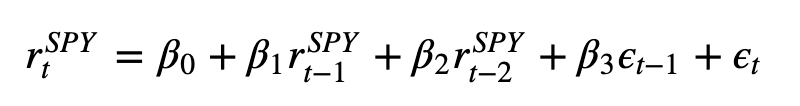

A popular and widely used statistical method for time series forecasting is the ARIMA model.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data. It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

Link for more details: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/#:~:text=Autoregressive%20Integrated%20Moving%20Average%20Model,making%20skillful%20time%20series%20forecasts.

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Predicting on last 10 points:
predicted=16204.356985, expected=14780.000000
predicted=16190.980733, expected=18719.000000
predicted=17007.543484, expected=19192.000000
predicted=15923.366055, expected=17449.000000
predicted=16489.629593, expected=14624.000000
predicted=15976.925815, expected=15113.000000
predicted=17357.368783, expected=17153.000000
predicted=17141.642425, expected=15171.000000
predicted=15634.925980, expected=19019.000000
predicted=17627.981018, expected=17941.000000
Test MSE: 3522116.105


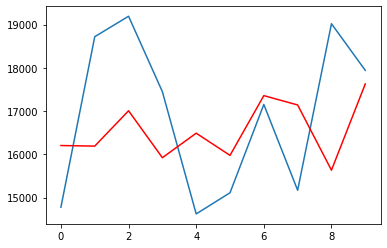

In [ ]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
from influxdb import InfluxDBClient
import operator
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import tensorflow as tf
# contrived dataset
#data = [x + random() for x in range(1, 100)]

def create_data(type):
    if type=='gen':
      X = [x + random() for x in range(1, 100)]
    
    elif type=='get':
      client = InfluxDBClient("sensorweb.us", "8086", "test", "sensorweb", "shake", ssl=True)
      unit = "b8:27:eb:16:1b:d7"


      stampIni = "2020-08-14T17:22:15.000Z";
      stampEnd = "2020-08-14T17:25:15.000Z";

      query = 'SELECT "value" FROM Z WHERE ("location" = \''+unit+'\')  and time >= \''+stampIni+'\' and time <= \''+stampEnd+'\'   '

      result = client.query(query)
      points = list(result.get_points())

      values =  map(operator.itemgetter('value'), points)
      times  =  map(operator.itemgetter('time'),  points)

      X=list(values)
    return X
      #no of points to use for testing
with tf.device('/device:GPU:0'):
  #parameters get: for influx streaming seismic data; gen: for generating data
    X=create_data('get')
    cnt=10
    size=len(X)-cnt

    #size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()

      #testing model on last 10 points
    print("Predicting on last",cnt,"points:")
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
      # plot
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()

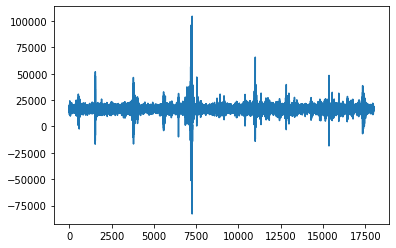

In [ ]:
pyplot.plot(X)

## Weakness:



*   Linear relationship;
*   Need to check multiple assumptions, like stationary

